<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/CV_Simple_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import time

n=1000
A_np=np.random.rand(n,n)
B_np=np.random.rand(n,n)

A_tf=tf.convert_to_tensor(A_np,dtype=tf.float32)
B_tf=tf.convert_to_tensor(B_np,dtype=tf.float32)

start_time=time.time()
C_np=np.dot(A_np,B_np)
end_time=time.time()
numpy_time=end_time-start_time
print(f"numpy time for matrix multiplication: {numpy_time:.6f} seconds",)


start_time=time.time()
with tf.device('/GPU:0'):
    C_tf=tf.matmul(A_tf,B_tf)
end_time=time.time()
gpu_time=end_time-start_time
print(f"tensorflow time for matrix multiplication: {gpu_time:.6f} seconds")

numpy time for matrix multiplication: 0.262435 seconds
tensorflow time for matrix multiplication: 0.434197 seconds


In [1]:
import numpy as np
import tensorflow as tf
import time

n=10000
A_np=np.random.rand(n,n)
B_np=np.random.rand(n,n)

A_tf=tf.convert_to_tensor(A_np,dtype=tf.float32)
B_tf=tf.convert_to_tensor(B_np,dtype=tf.float32)

start_time=time.time()
C_np=np.dot(A_np,B_np)
end_time=time.time()
numpy_time=end_time-start_time
print(f"numpy time for matrix multiplication: {numpy_time:.6f} seconds",)


start_time=time.time()
with tf.device('/GPU:0'):
    C_tf=tf.matmul(A_tf,B_tf)
end_time=time.time()
gpu_time=end_time-start_time
print(f"tensorflow time for matrix multiplication: {gpu_time:.6f} seconds")

numpy time for matrix multiplication: 65.972646 seconds
tensorflow time for matrix multiplication: 0.148060 seconds


In [2]:
# Linear NN for Images

In [3]:
import tensorflow as tf

IMG_HEIGHT=224
IMG_WIDTH=224
IMG_CHANNELS=3

CLASS_NAMES=["daisy","dandelion","roses","sunflowers","tulips"]

In [4]:
def read_and_decode(filename,resize_dims):
  # 1. Read the raw file
  img_bytes=tf.io.read_file(filename)
  # 2. Decode image data
  img=tf.image.decode_jpeg(img_bytes,channels=IMG_CHANNELS)
  # 3. Convert pixel values to floats in [0,1]
  img=tf.image.convert_image_dtype(img,tf.float32)
  # 4. Resize the image to match desired dimensions
  img=tf.image.resize(img,resize_dims)
  return img

In [5]:
def parse_csvline(csv_line):
  # record_defaults specify the data types for each column
  record_default=["",""]
  filename, label_string=tf.io.decode_csv(csv_line, record_defaults=record_default)

  img=read_and_decode(filename,(IMG_HEIGHT,IMG_WIDTH))

  label=tf.argmax(tf.math.equal(CLASS_NAMES,label_string))
  return img, label

In [11]:
# Define datasets
train_dataset = (
    tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/train_set.csv")
    .map(parse_csvline, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(16)
    .prefetch(tf.data.AUTOTUNE)
)

eval_dataset = (
    tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/eval_set.csv")
    .map(parse_csvline, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(16)
    .prefetch(tf.data.AUTOTUNE)
)

In [12]:
for image_batch , label_batch in train_dataset.take(1):
  print("Image batch shape:", image_batch.shape)
  print("Label batch shape:", label_batch.shape)
  print("Labels:",label_batch.numpy())

Image batch shape: (16, 224, 224, 3)
Label batch shape: (16,)
Labels: [0 1 1 1 0 2 1 0 4 3 0 3 1 4 4 1]


In [13]:
for image_batch , label_batch in train_dataset.take(2):
  print("Image batch shape:", image_batch.shape)
  print("Label batch shape:", label_batch.shape)
  print("Labels:",label_batch.numpy())

Image batch shape: (16, 224, 224, 3)
Label batch shape: (16,)
Labels: [0 1 1 1 0 2 1 0 4 3 0 3 1 4 4 1]
Image batch shape: (16, 224, 224, 3)
Label batch shape: (16,)
Labels: [0 3 2 1 0 4 2 0 2 2 1 3 3 2 1 0]


In [14]:
for image_batch , label_batch in train_dataset.take(3):
  print("Image batch shape:", image_batch.shape)
  print("Label batch shape:", label_batch.shape)
  print("Labels:",label_batch.numpy())

Image batch shape: (16, 224, 224, 3)
Label batch shape: (16,)
Labels: [0 1 1 1 0 2 1 0 4 3 0 3 1 4 4 1]
Image batch shape: (16, 224, 224, 3)
Label batch shape: (16,)
Labels: [0 3 2 1 0 4 2 0 2 2 1 3 3 2 1 0]
Image batch shape: (16, 224, 224, 3)
Label batch shape: (16,)
Labels: [3 1 1 1 1 0 1 2 4 3 3 2 0 1 4 0]


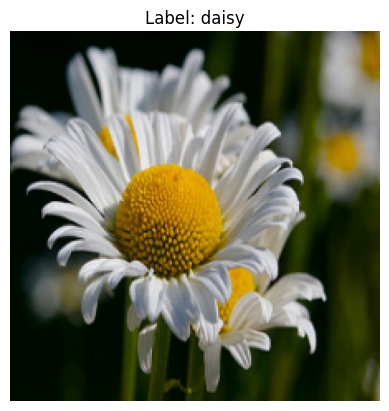

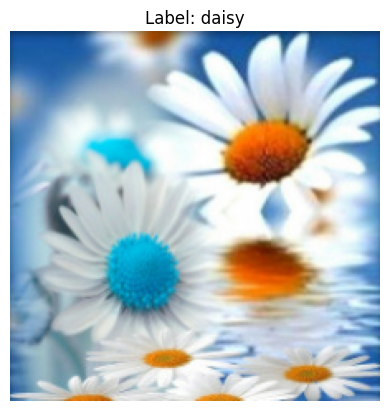

In [16]:
import matplotlib.pyplot as plt

for image_batch, label_batch in train_dataset.take(2):
  first_image=image_batch[0]
  first_label=label_batch[0]
  plt.imshow(first_image.numpy())
  plt.title(f"Label: {CLASS_NAMES[first_label]}")
  plt.axis("off")
  plt.show()

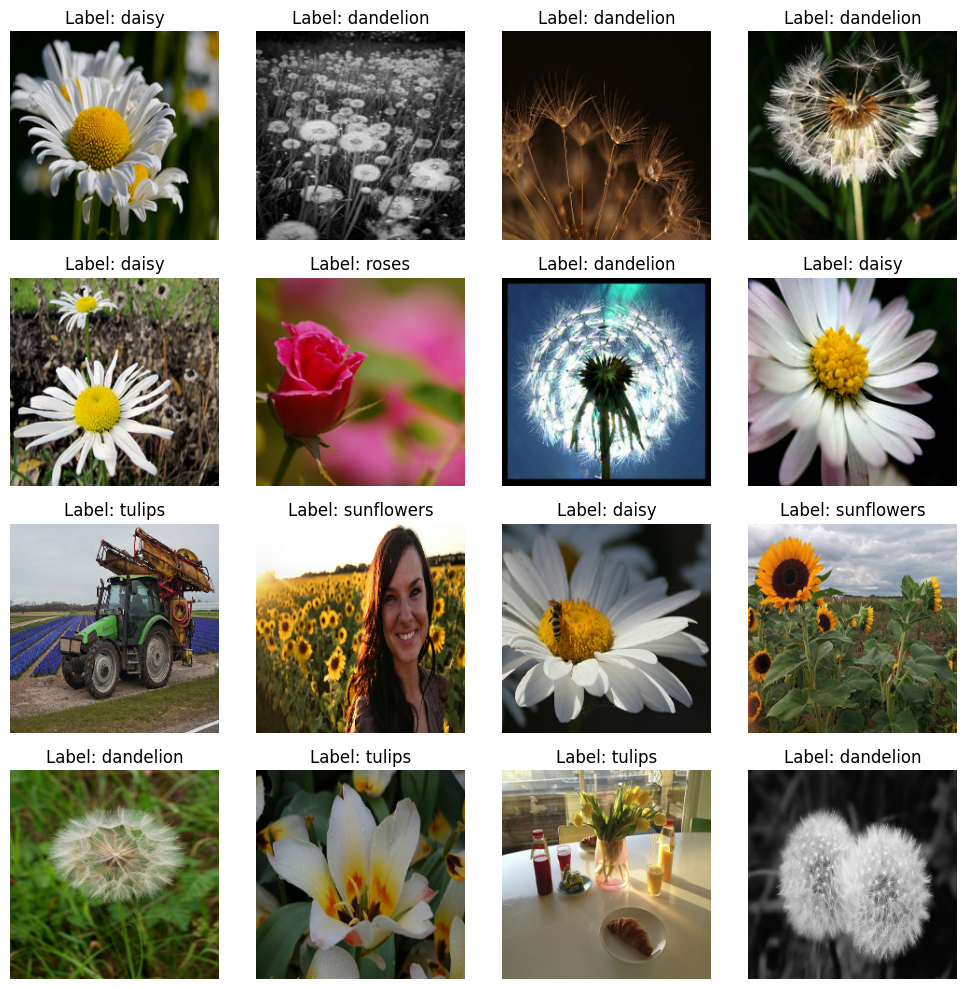

In [17]:
for image_batch, label_batch in train_dataset.take(1):
  fig, axes=plt.subplots(4,4,figsize=(10,10))
  for i in range(16):
    ax=axes[i//4, i%4]
    ax.imshow(image_batch[i].numpy())
    ax.set_title(f"Label: {CLASS_NAMES[label_batch[i]]}")
    ax.axis("off")

  plt.tight_layout()
  plt.show()

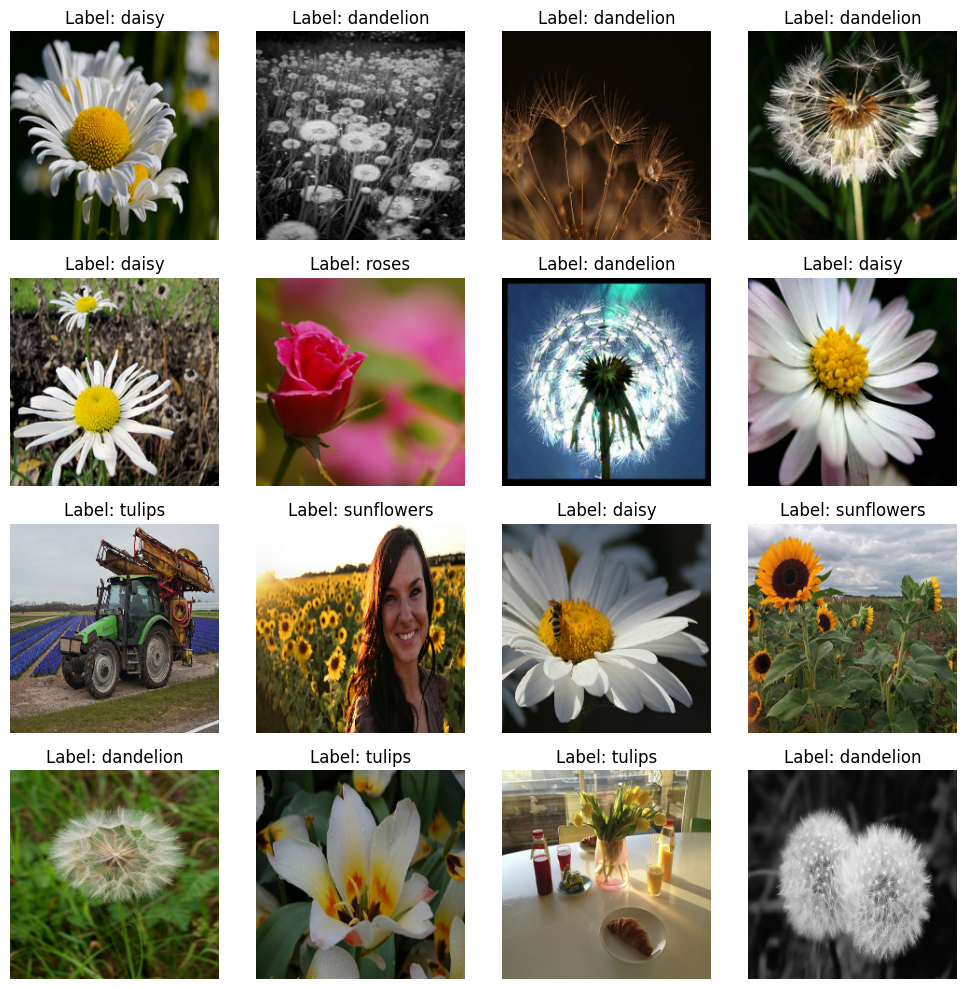

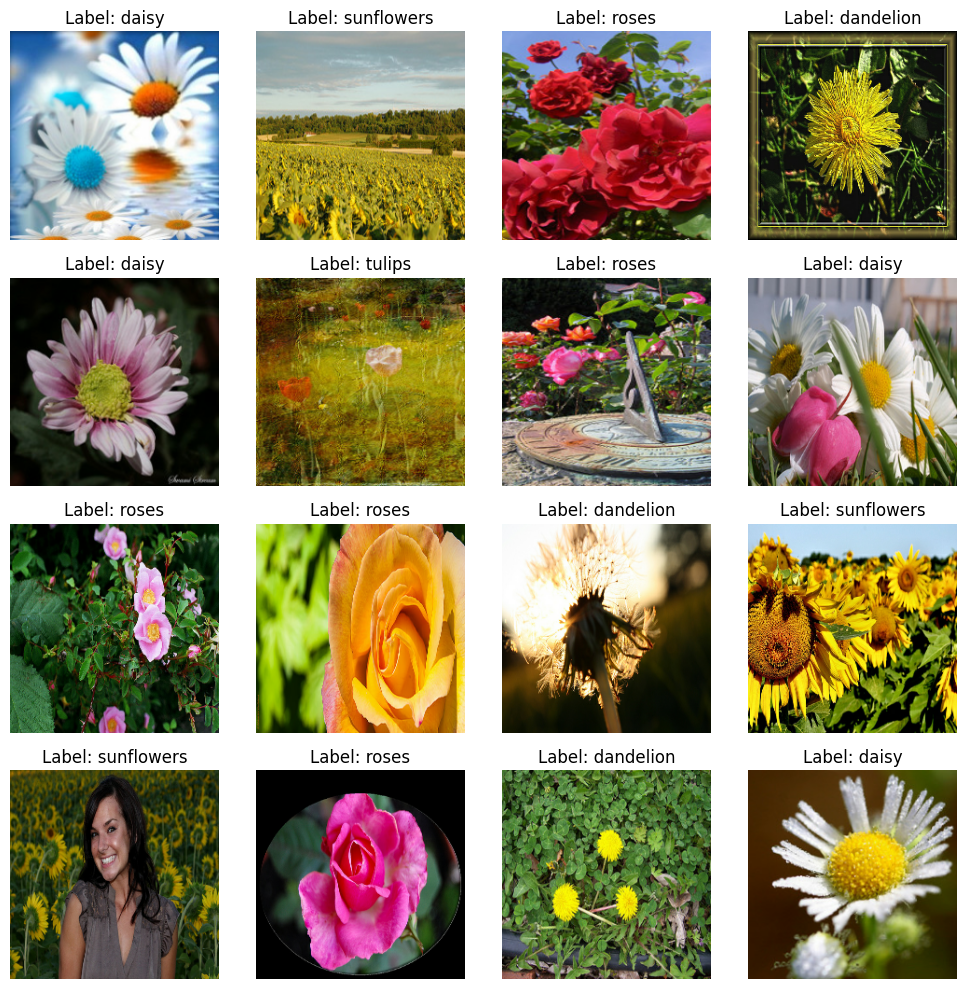

In [18]:
for image_batch, label_batch in train_dataset.take(2):
  fig, axes=plt.subplots(4,4,figsize=(10,10))
  for i in range(16):
    ax=axes[i//4, i%4]
    ax.imshow(image_batch[i].numpy())
    ax.set_title(f"Label: {CLASS_NAMES[label_batch[i]]}")
    ax.axis("off")

  plt.tight_layout()
  plt.show()

In [19]:
# shallow neural network how best it performs compared to a random 20% guess

In [20]:
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS)),
    keras.layers.Dense(len(CLASS_NAMES),activation="softmax")
])

model.compile(
    optimizer="adam",
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
EPOCHS=10
history=model.fit(
    train_dataset,
    validation_data=eval_dataset,
    epochs=EPOCHS
)

Epoch 1/10
    207/Unknown 255s 1s/step - accuracy: 0.3237 - loss: 19.3445

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


207/207 ━━━━━━━━━━━━━━━━━━━━ 289s 1s/step - accuracy: 0.3238 - loss: 19.3188 - val_accuracy: 0.4000 - val_loss: 9.2461
Epoch 2/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.4275 - loss: 9.1616 - val_accuracy: 0.4351 - val_loss: 11.4511
Epoch 3/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.4535 - loss: 8.2240 - val_accuracy: 0.4568 - val_loss: 7.7586
Epoch 4/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 198s 904ms/step - accuracy: 0.4911 - loss: 9.7333 - val_accuracy: 0.4000 - val_loss: 18.3378
Epoch 5/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 201s 971ms/step - accuracy: 0.5052 - loss: 9.1112 - val_accuracy: 0.4514 - val_loss: 9.4880
Epoch 6/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 201s 966ms/step - accuracy: 0.5032 - loss: 9.7301 - val_accuracy: 0.4108 - val_loss: 13.6372
Epoch 7/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 202s 966ms/step - accuracy: 0.5648 - loss: 7.8451 - val_accuracy: 0.4135 - val_loss: 19.9499
Epoch 8/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 201s 960ms/step - accuracy: 0.5219 - loss: 11.2323 

In [22]:
# validation accuracy should improve

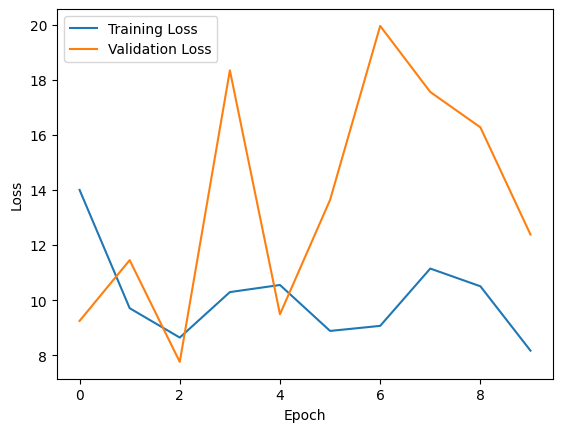

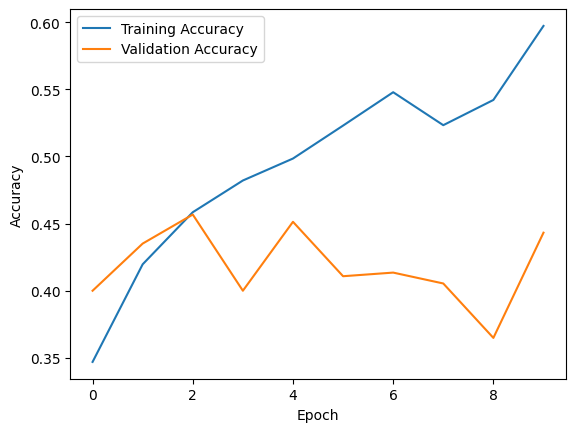

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


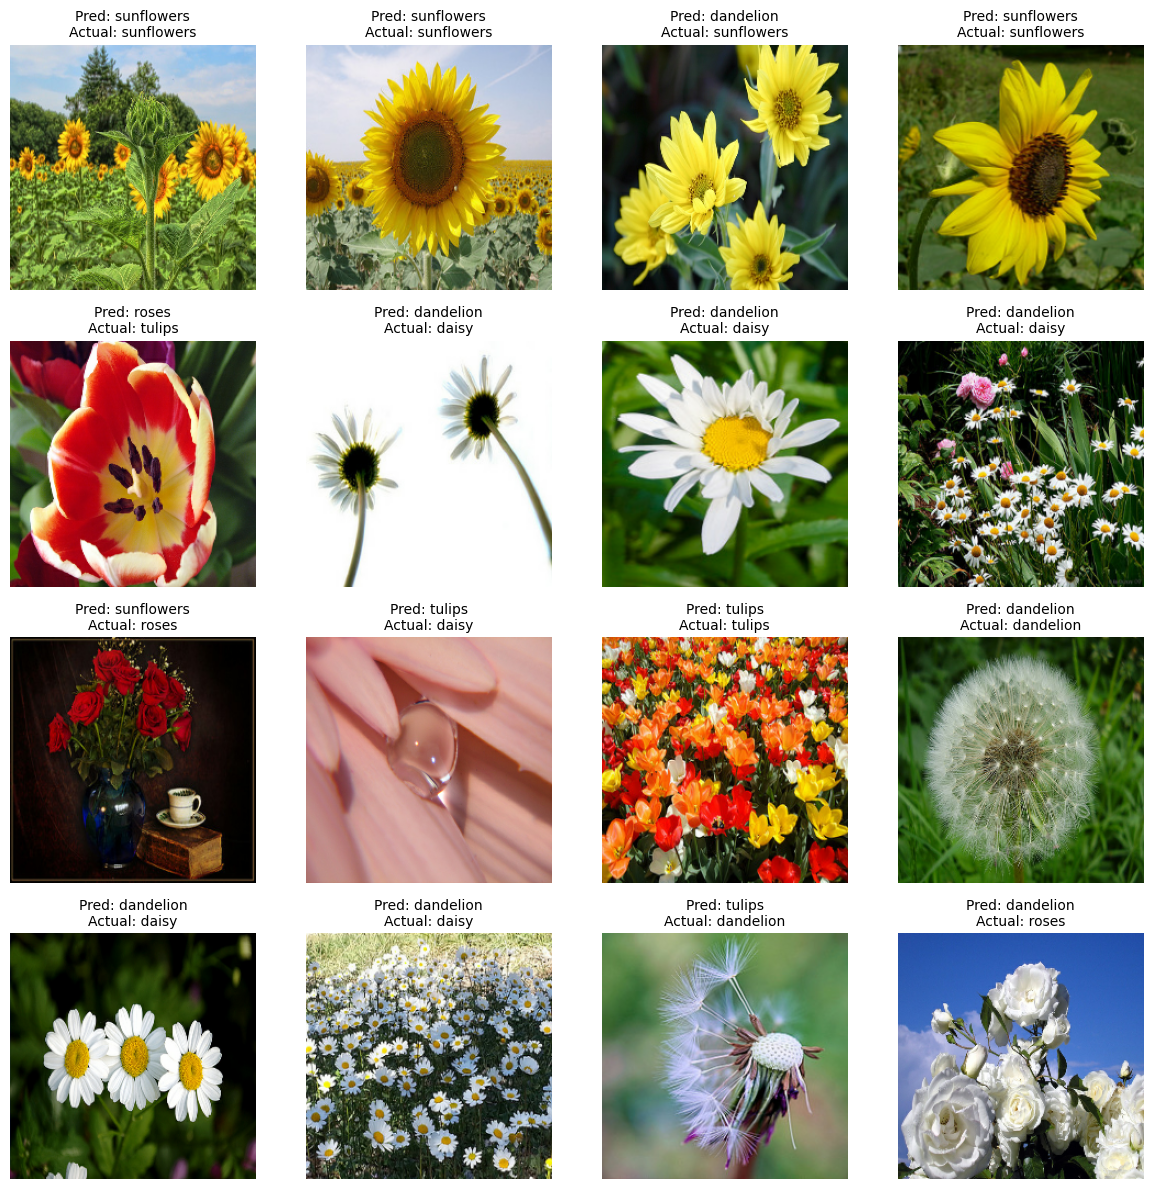

In [24]:
import numpy as np
import math

for images, labels in eval_dataset.take(1):
  batch_predictions=model.predict(images)
  predicted_indices=np.argmax(batch_predictions,axis=1)

  num_images=images.shape[0]
  num_cols=4
  num_rows=math.ceil(num_images/num_cols)

  plt.figure(figsize=(12,3*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows,num_cols,i+1)
    plt.imshow(images[i].numpy())
    plt.axis('off')


    pred_class=CLASS_NAMES[predicted_indices[i]]
    actual_class=CLASS_NAMES[labels[i].numpy()]

    plt.title(f"Pred: {pred_class}\nActual: {actual_class}",fontsize=10)

  plt.tight_layout()
  plt.show()

In [25]:
# for betterment use deep neural network, introduce non-linear activation functions and use convolution operation